In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import siiFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [3]:
# bandwidth = 0.01
# grid_x    = grid(bandwidth, start=-5, end=15)
# mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])

# # Chọn độ rộng cố định cho Uniform
# width = 2.0

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [4]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-8, end=25)


std = 0.8
IR = 10
n1, n2 = 10, int(IR * 10)
mu1 = np.random.normal(0, std, n1)
mu2 = np.random.normal(10, std, n2)
sig1 = np.ones_like(mu1)
sig2 = np.ones_like(mu2)

F1 = generateGauss(mu1, sig1, grid_x)
F2 = generateGauss(mu2, sig2, grid_x)
F_data = np.vstack([F1, F2])

In [5]:
cluster=siiFCF.Model(
   grid_x=grid_x,
   seed=42,
    num_clusters=2,
    fuzziness= 2,
    max_iterations= 100,
    tolerance= 1e-6,
    distance_metric= 'L2',
    verbose = False,
   #  centroid_mode="mean"
)
cluster.fit(F_data)
U, Theta, J = cluster.get_results()
labels = cluster.get_hard_assignments()

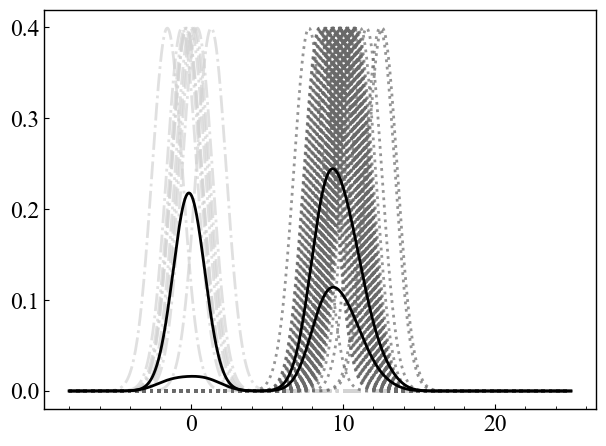

In [6]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=10, h=5, u='centimeters')

# pdfs
for i in range(F_data.shape[0]):
	ls = '-.' if labels[i] == 0 else ':'
	color = 'lightgray' if labels[i] == 0 else 'dimgray'
	plt.plot(grid_x, F_data[i], lw=2, color=color, linestyle=ls, alpha=0.7)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()
# plt.savefig("FCF_V4.pdf", bbox_inches='tight')

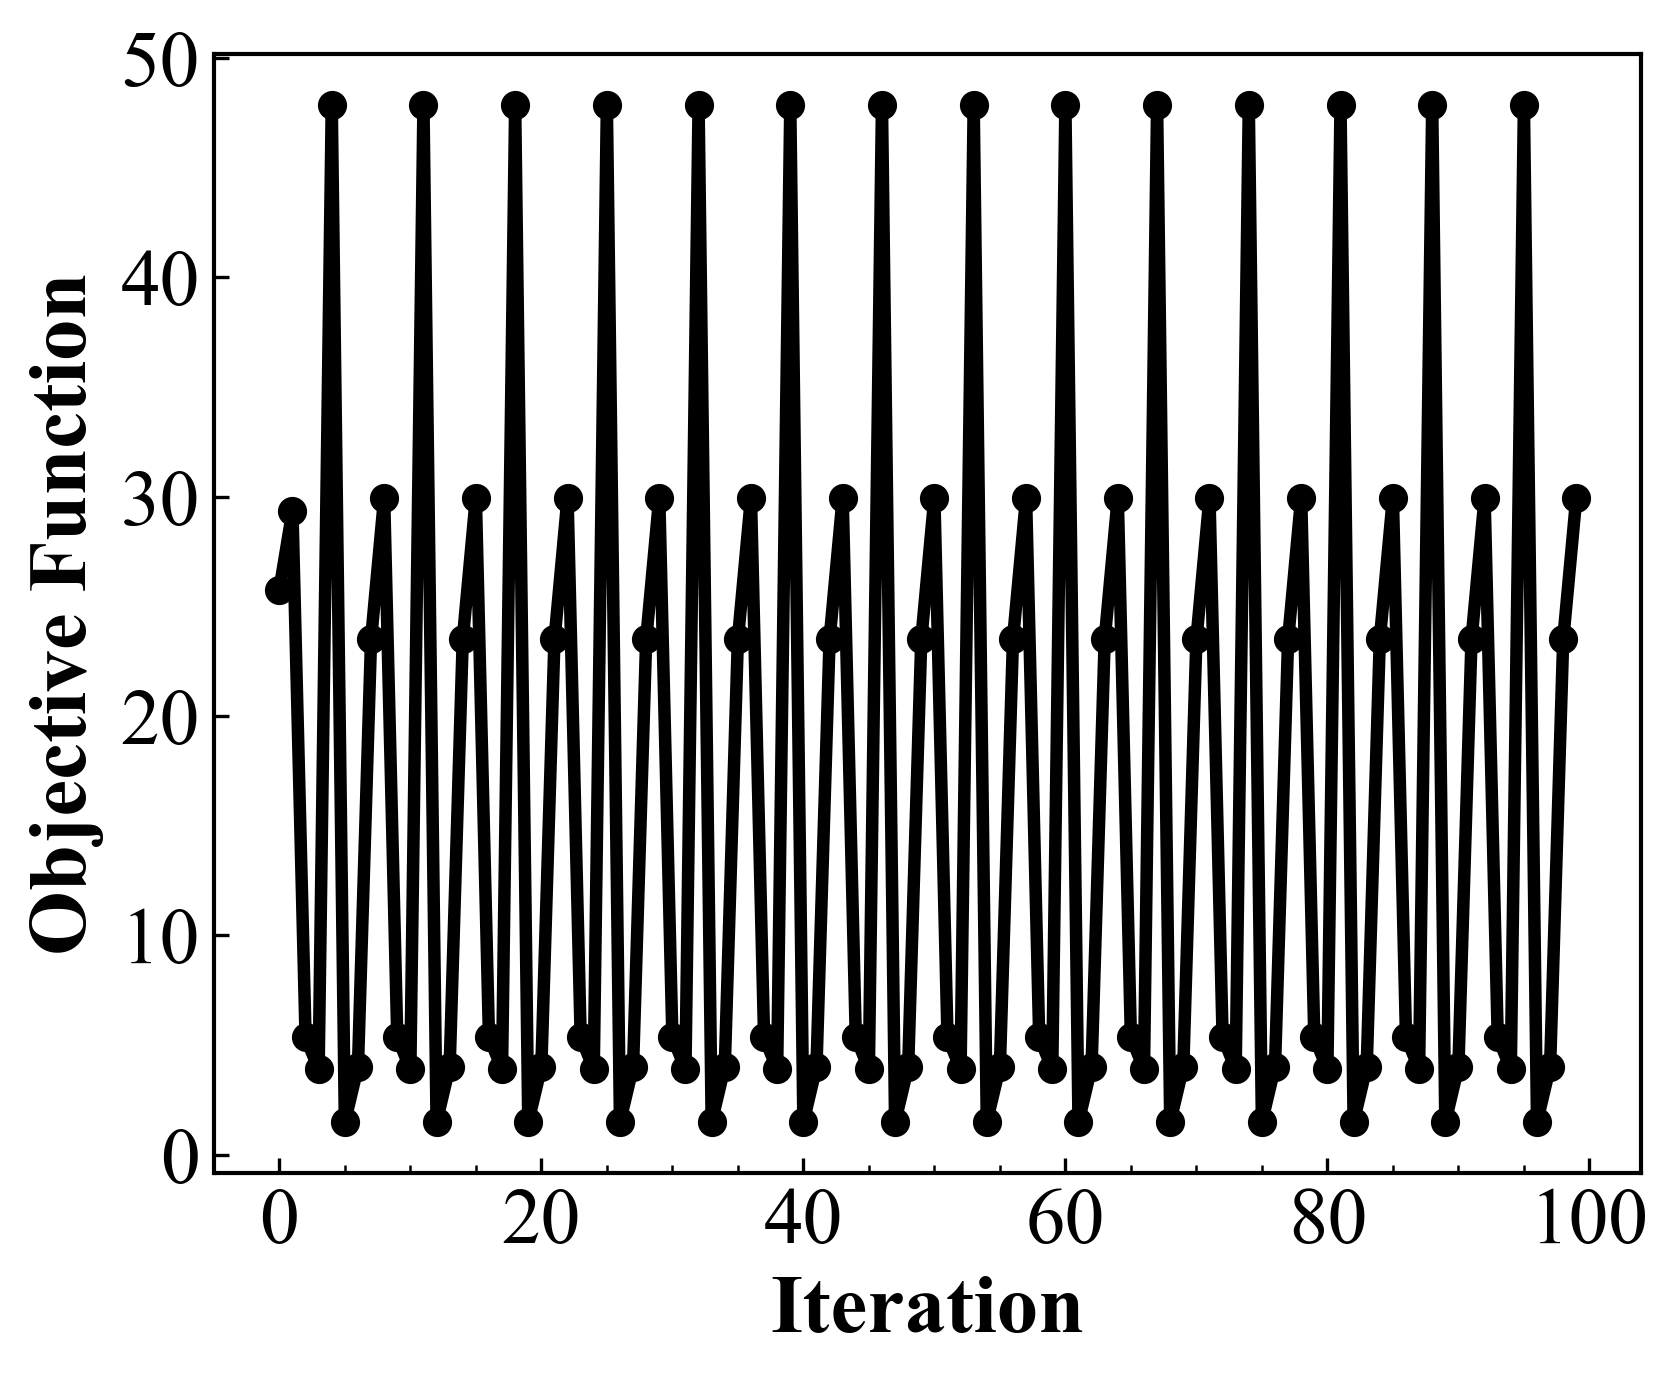

In [7]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()

In [8]:
from utils.vali import CVI

evaluator = CVI(distance_metric='BC',bandwidth=bandwidth, grid=grid_x)


sil = evaluator.silhouette_index(F_data, labels)
dunn = evaluator.dunn_index(F_data, labels)
dbi = evaluator.davies_bouldin_index(F_data, labels)

print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

Silhouette = 0.9876, Dunn = 1.7764, DBI = 0.0162


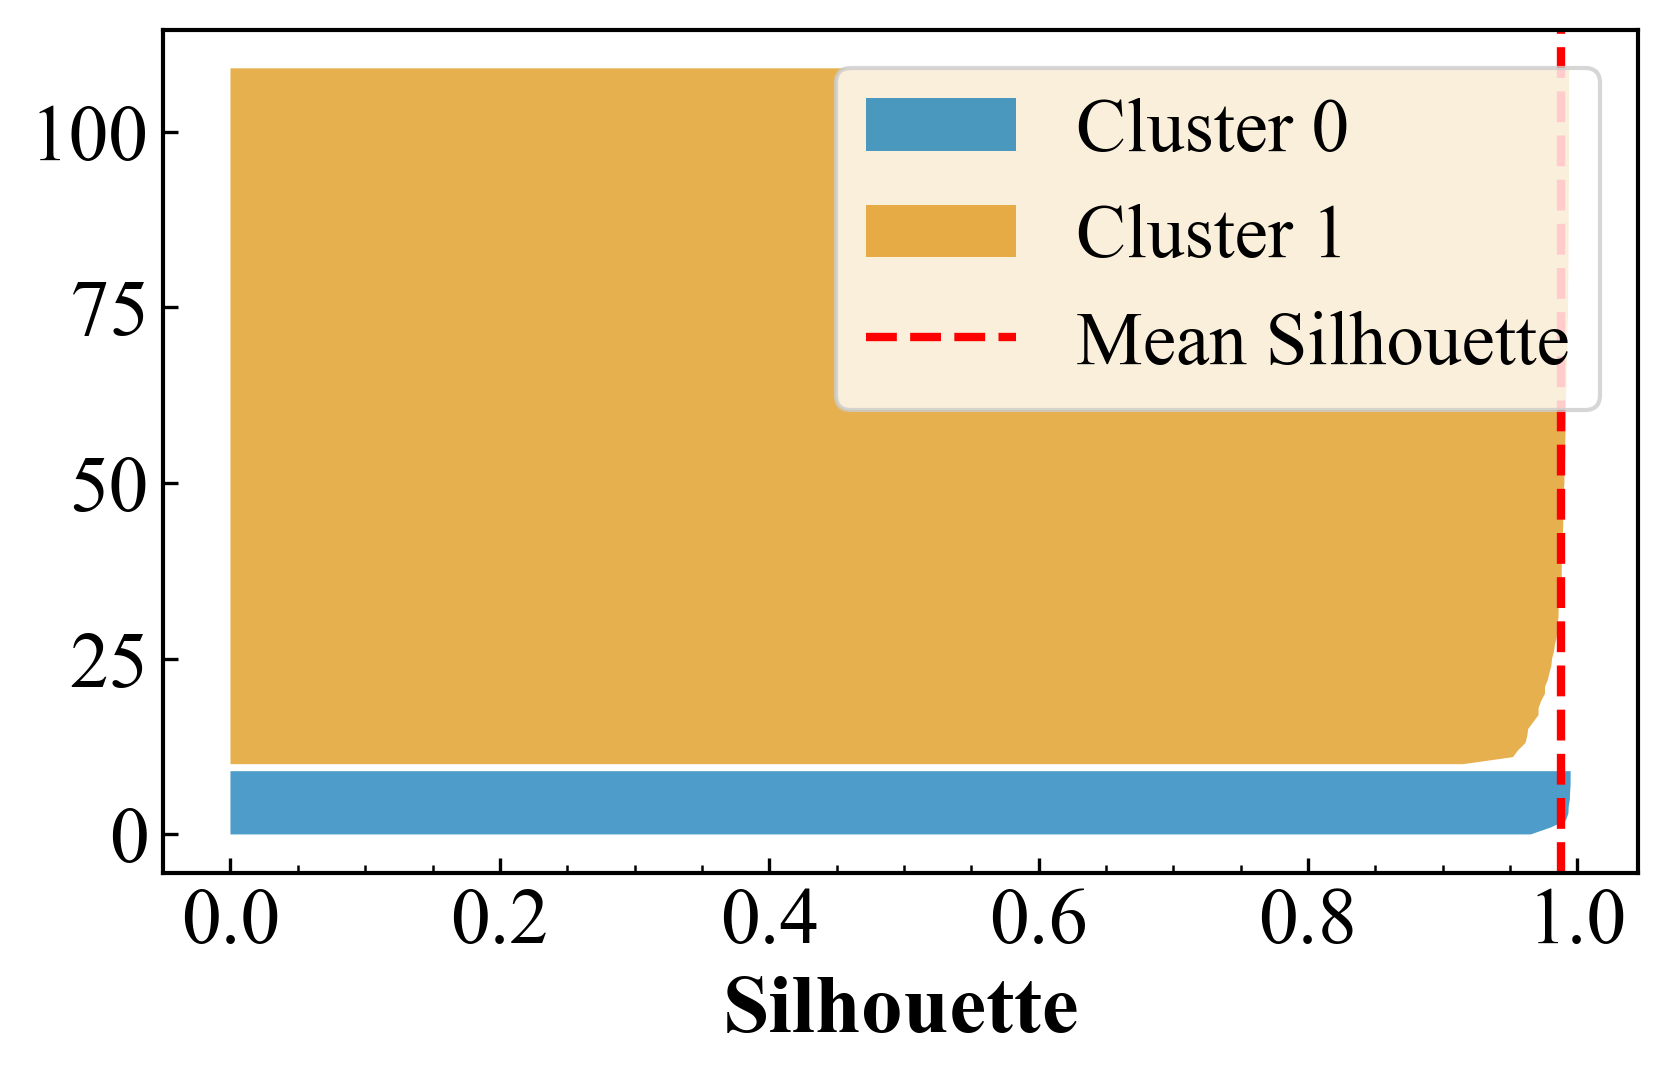

Silhouette fj: [0.96542466 0.99496929 0.99440669 0.99492504 0.9949669  0.99460675
 0.98037497 0.99150099 0.99357172 0.99333353 0.99081022 0.95614572
 0.96141449 0.98069689 0.99101563 0.9938745  0.97929868 0.99339689
 0.91535553 0.99372203 0.99383666 0.99203874 0.97592025 0.99323955
 0.99308202 0.97314677 0.99067457 0.9916195  0.9759417  0.99358194
 0.98718161 0.99387365 0.99100481 0.99304739 0.99303552 0.98948027
 0.99387145 0.99378341 0.98874965 0.99252359 0.9937586  0.99227918
 0.98601323 0.9899642  0.98332157 0.99379233 0.99350427 0.98979987
 0.991137   0.98836169 0.99307874 0.99354052 0.99288496 0.99254031
 0.9860933  0.99186938 0.99039156 0.97807938 0.99381526 0.99336836
 0.98857807 0.98259526 0.99309389 0.96281136 0.99037115 0.99340294
 0.97115698 0.95220013 0.98924844 0.99379427 0.96733154 0.99387089
 0.98812155 0.99145439 0.98533274 0.98907299 0.99386191 0.99353626
 0.99358174 0.98506063 0.98626719 0.98465047 0.96345497 0.99340755
 0.99386234 0.99236666 0.9883734  0.99333949 0.

In [9]:
sil_values = plot_silhouette_values(F_data, labels,
                                    distance_metric='BC',
                                    bandwidth=bandwidth,
                                    grid=grid_x)
print("Silhouette fj:", sil_values)

In [10]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = csiFCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)